In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
'''
stratify
바이너리 데이타일때
Target이 25%(0), 75%(1) 이 비율로 유지한 채로 라벨 데이타를 분할할 때 사용
'''

In [43]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [44]:
###정확도 출력
print('훈련세트 데이타 정확도:{:3f}'.format(tree.score(X_train, y_train)))
print('테스트 데이타 정확도:{:3f}'.format(tree.score(X_test, y_test)))

훈련세트 데이타 정확도:1.000000
테스트 데이타 정확도:0.937063


### 가지치기
    기대효과는 가지치기를 해서 훈련세트 오버핏팅 비율은 낮추고 테스트 데이타 정확도는 높이고 싶다

In [22]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [42]:
###정확도 출력
print('훈련세트 데이타 정확도:{:3f}'.format(tree.score(X_train, y_train)))
print('테스트 데이타 정확도:{:3f}'.format(tree.score(X_test, y_test)))

훈련세트 데이타 정확도:1.000000
테스트 데이타 정확도:0.937063


### 특성 중요도

In [26]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [24]:
print('특성 중요도 :\n{}'.format(tree.feature_importances_))

특성 중요도 :
[0.         0.04146788 0.         0.         0.         0.
 0.         0.         0.         0.         0.01349572 0.02952657
 0.         0.         0.         0.         0.         0.
 0.         0.         0.77284494 0.         0.00969064 0.
 0.         0.         0.01507241 0.11790184 0.         0.        ]


### 특성중요도 시각화

In [28]:
import matplotlib.pyplot as plt
import numpy as np

(569, 30)

In [30]:
cancer.data.shape
cancer.data.shape[1]

30

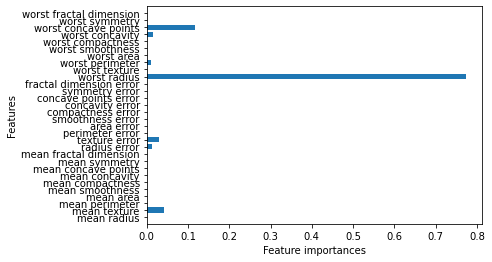

In [36]:
def plot_feature_importances_cancer(model):
    n_feature = cancer.data.shape[1]
    plt.barh(range(n_feature), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feature), cancer.feature_names)
    plt.xlabel('Feature importances')
    plt.ylabel('Features')
    plt.ylim(-1, n_feature)
    
plot_feature_importances_cancer(tree)

### 결정트리 시각화

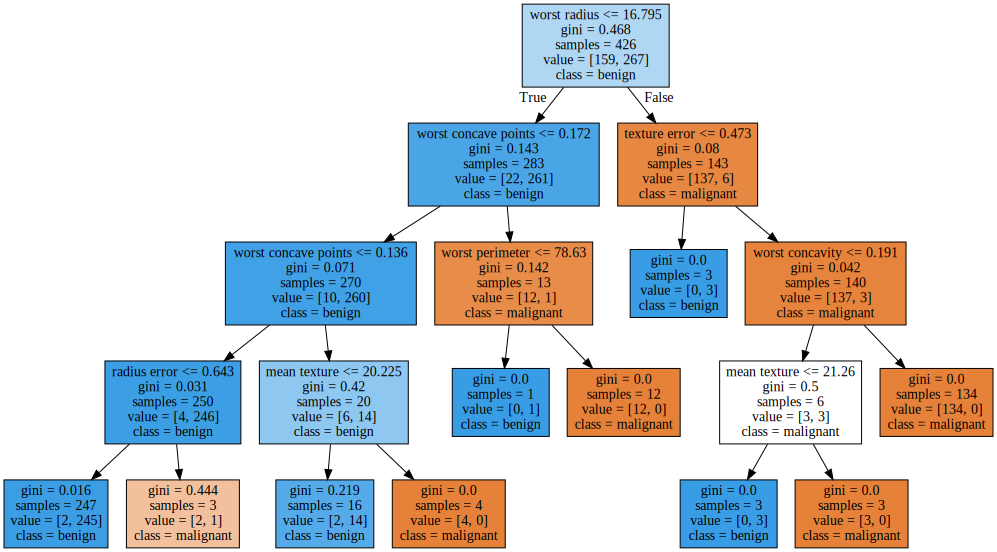

'cancer_tree.png.pdf'

In [39]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file = 'cancer_tree.dot',
               class_names=cancer.target_names,
               feature_names=cancer.feature_names,
#                 impurity = False, #gini 미출력
               filled=True)

with open('cancer_tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)    #dot_graph의 source 지정

display(dot)

dot.render(filename = 'cancer_tree.png')